# Water Quality Prediction

## Data Gathering

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [94]:
df = pd.read_csv('water_potability.csv')
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,219.674262,22210.613083,5.875041,333.775777,398.517703,11.502316,112.412210,2.994259,0
1,6.783888,193.653581,13677.106441,5.171454,323.728663,477.854687,15.056064,66.396293,3.250022,0
2,6.010618,184.558582,15940.573271,8.165222,421.486089,314.529813,20.314617,83.707938,4.867287,1
3,8.097454,218.992436,18112.284447,6.196947,333.775777,376.569803,17.746264,59.909941,4.279082,1
4,8.072612,210.269780,16843.363927,8.793459,359.516169,559.167574,17.263576,68.738989,5.082206,0


# Exploratory Data Analysis

In [95]:
df.shape

(2293, 10)

In [96]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2293 entries, 0 to 2292
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2293 non-null   float64
 1   Hardness         2293 non-null   float64
 2   Solids           2293 non-null   float64
 3   Chloramines      2293 non-null   float64
 4   Sulfate          2293 non-null   float64
 5   Conductivity     2293 non-null   float64
 6   Organic_carbon   2293 non-null   float64
 7   Trihalomethanes  2293 non-null   float64
 8   Turbidity        2293 non-null   float64
 9   Potability       2293 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 179.3 KB


In [98]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000
mean,7.082265,196.390335,22074.335334,7.132987,333.393347,425.455702,14.229174,66.499518,3.967153,0.390318
std,1.486029,32.460633,8668.693908,1.573879,36.116271,80.266652,3.341429,16.067742,0.788480,0.487928
min,0.000000,47.432000,320.942611,0.530351,180.206746,201.619737,2.200000,0.738000,1.450000,0.000000
25%,6.262799,176.753500,15825.182571,6.140033,316.552791,363.974060,12.015868,56.329076,3.440753,0.000000
50%,7.080795,196.833001,21153.322827,7.135063,333.775777,420.828362,14.151538,66.396293,3.947138,0.000000
75%,7.873272,216.441172,27345.174288,8.104498,349.985243,480.715208,16.450990,77.182622,4.503661,1.000000
max,14.000000,317.338124,56351.396304,13.043806,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [99]:
df.fillna(df.mean(), inplace=True)
df.isnull().sum()


ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [100]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,219.674262,22210.613083,5.875041,333.775777,398.517703,11.502316,112.412210,2.994259,0
1,6.783888,193.653581,13677.106441,5.171454,323.728663,477.854687,15.056064,66.396293,3.250022,0
2,6.010618,184.558582,15940.573271,8.165222,421.486089,314.529813,20.314617,83.707938,4.867287,1
3,8.097454,218.992436,18112.284447,6.196947,333.775777,376.569803,17.746264,59.909941,4.279082,1
4,8.072612,210.269780,16843.363927,8.793459,359.516169,559.167574,17.263576,68.738989,5.082206,0


In [101]:
df.Potability.value_counts()

Potability
0    1398
1     895
Name: count, dtype: int64

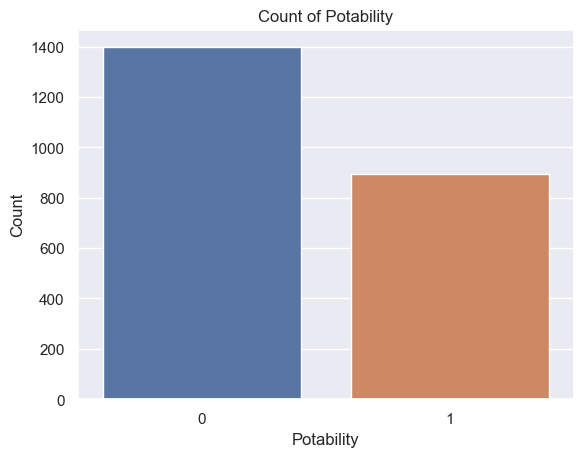

In [102]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="darkgrid")

# Assuming your DataFrame is named 'df' and the column of interest is 'Potability'
sns.countplot(data=df, x='Potability')
plt.xlabel('Potability')
plt.ylabel('Count')
plt.title('Count of Potability')
plt.xticks(ticks=[0, 1], labels=['0', '1'])  # Set custom x-axis labels
plt.show()


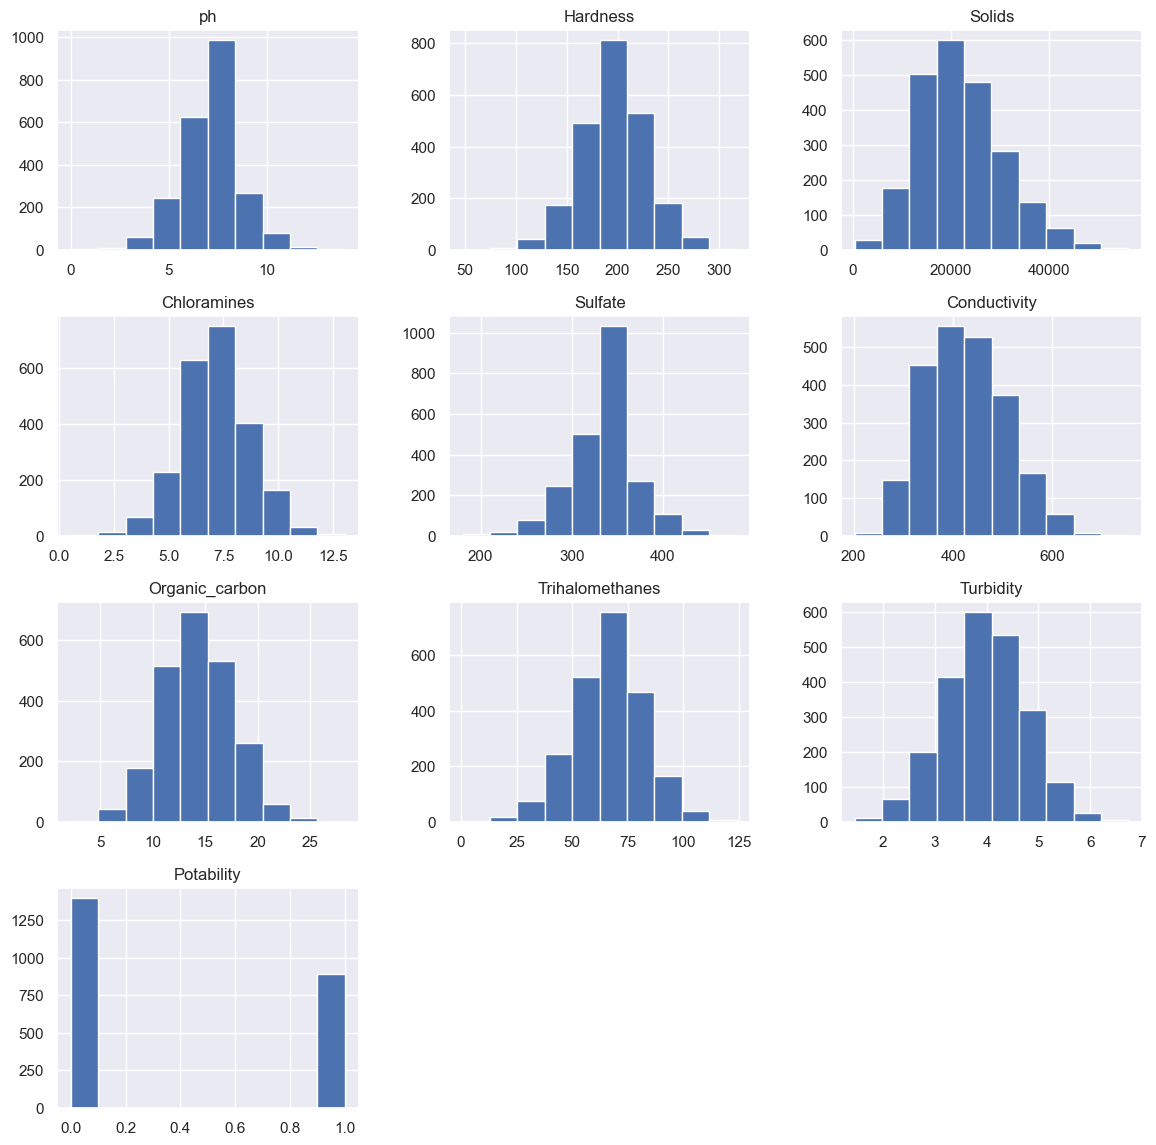

In [103]:
df.hist(figsize=(14,14))
plt.show()

In [104]:
X = df.drop('Potability',axis=1)
Y= df['Potability']

In [105]:
def result(x):
    if x == 0:
        return "portable"
    elif x == 1:
        return "not portable"

df['result'] = df['Potability'] .apply(result)
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability,result
0,7.080795,219.674262,22210.613083,5.875041,333.775777,398.517703,11.502316,112.412210,2.994259,0,portable
1,6.783888,193.653581,13677.106441,5.171454,323.728663,477.854687,15.056064,66.396293,3.250022,0,portable
2,6.010618,184.558582,15940.573271,8.165222,421.486089,314.529813,20.314617,83.707938,4.867287,1,not portable
3,8.097454,218.992436,18112.284447,6.196947,333.775777,376.569803,17.746264,59.909941,4.279082,1,not portable
4,8.072612,210.269780,16843.363927,8.793459,359.516169,559.167574,17.263576,68.738989,5.082206,0,portable


In [106]:
df['result'].value_counts()

result
portable        1398
not portable     895
Name: count, dtype: int64

In [107]:
X=df[['ph','Hardness','Solids','Chloramines','Sulfate','Conductivity','Organic_carbon','Trihalomethanes','Turbidity']]
Y=df['result']
X.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,7.080795,219.674262,22210.613083,5.875041,333.775777,398.517703,11.502316,112.412210,2.994259
1,6.783888,193.653581,13677.106441,5.171454,323.728663,477.854687,15.056064,66.396293,3.250022
2,6.010618,184.558582,15940.573271,8.165222,421.486089,314.529813,20.314617,83.707938,4.867287
3,8.097454,218.992436,18112.284447,6.196947,333.775777,376.569803,17.746264,59.909941,4.279082
4,8.072612,210.269780,16843.363927,8.793459,359.516169,559.167574,17.263576,68.738989,5.082206


In [108]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size= 0.2, random_state=101,shuffle=True)

## Train  and check accuracy

In [156]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2, random_state=68, shuffle=True)

# Create a LogisticRegression object
lr = LogisticRegression()

# Fit the model on the training data
classifier = lr.fit(X_train, Y_train)

In [157]:
predictions = lr.predict(X_test)
accuracy = accuracy_score(Y_test, predictions)
confusion_mat = confusion_matrix(Y_test, predictions)
report = classification_report(Y_test, predictions)



In [158]:
print("Accuracy Score =", accuracy * 100)
print("Confusion Matrix:")
print(confusion_mat)
print("Classification Report:")
print(report)

Accuracy Score = 62.745098039215684
Confusion Matrix:
[[  3 170]
 [  1 285]]
Classification Report:
              precision    recall  f1-score   support

not portable       0.75      0.02      0.03       173
    portable       0.63      1.00      0.77       286

    accuracy                           0.63       459
   macro avg       0.69      0.51      0.40       459
weighted avg       0.67      0.63      0.49       459



In [159]:
classifier.predict([[6.010618,	184.558582,	15940.573271,	8.165222,	421.486089,	314.529813,	20.314617,	83.707938,	4.867287]])
#   classifier.predict([[8.099124,	224.236259,	19909.54173,	9.275884,	0.000000,	418.606213,	16.868637,	66.420093,	3.055934]])

  

array(['portable'], dtype=object)

In [113]:
# pickling the model
import pickle# module is imported
pickle_out = open("classifier.pkl", "wb")#"classifier.pkl" is opened in write-binary mode ("wb")
pickle.dump(classifier, pickle_out)# serialize the classifier object and write it to the file
pickle_out.close()

# Thank You !!!!!